## Introduction

We will analyze customers' credit card payments and use their transaction data to study the characteristics of customers most likely to default, ultimately building a profile of those customers. this customer. Credit card defaults have been an area of extensive interest and analysis for more than a decade. There are two types of loans – secured and unsecured. A secured loan is a loan where some collateral is required, so whenever a default occurs, the banking institutions can take control of the underlying assets. This property can vary from real estate to automobiles. In general, a secured loan is considered low risk. Unlike a secured loan, an unsecured loan does not require any underlying collateral. Credit lines are unsecured by nature, so whenever there is default on payments, it is the credit card company or the bank that suffers. This concern has prompted banks and companies to invest heavily in analyzing and predicting credit card defaults. In this chapter, we will build profiles of customers most likely to default using techniques such as univariate and bivariate analysis. With this analysis, we will be able to understand the factors or characteristics of customers that are likely to default. This record will serve as a criterion for the bank or lender to detect potential defaulters and take appropriate actions in a timely manner.


## About The Dataset

### Dataset Information

This dataset contains information about default payments, demographic factors, credit data, payment history and billing statements of credit card customers in Taiwan from April 2005 to September 2005.

### Dataset Description
- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit.
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.
- **PAY_1**: Repayment status in September, 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, … 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in April, 2005 (scale same as above).
- **PAY_3**: Repayment status in April, 2005 (scale same as above).
- **PAY_4**: Repayment status in April, 2005 (scale same as above).
- **PAY_5**: Repayment status in April, 2005 (scale same as above).
- **PAY_6**: Repayment status in April, 2005 (scale same as above).
- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar).
- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar).
- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar).
- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar).
- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar).
- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar).
- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar).
- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar).
- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar).
- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar).
- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar).
- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar).
- **default.payment.next.month**: Default payment (1 = yes, 0 = no).

### Dataset Source: 
https://github.com/ddan0606/Projects/tree/main/Datasets

## Import libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Data

In [2]:
url = 'https://raw.githubusercontent.com/ddan0606/Projects/main/Datasets/default_credit.csv'

In [3]:
df = pd.read_csv(url, index_col = 0)
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

<hr>

**Remarks**:
- The dataset has 30000 samples and 25 columns.
- In which there are 24 feature columns and 1 column is a set of labels.
- No nan values, null.

### Check the descriptive statistics for the numerical columns in the DataFrame:

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


## Data Processing

Before proceeding with the analysis of each column, let's look at the unique values in the column. The purpose of looking at unique values in a column is to determine the value in each column. By knowing the value in each column, we will be able to understand which category has a higher number or vice versa.

### Unique value
This step acts as a precursor before we build a profile of our customers. 

In [6]:
unique = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "default.payment.next.month"]

for i in unique:
    print(i + ': ' + str(sorted(df[i].unique())))
    print()

SEX: [1, 2]

EDUCATION: [0, 1, 2, 3, 4, 5, 6]

MARRIAGE: [0, 1, 2, 3]

PAY_0: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

default.payment.next.month: [0, 1]



The **EDUCATION** column has **7 unique values**, but as per our data description,
we have only **4 unique values**, so we are going to club categories **0, 5, and 6** with
category **4**:

In [7]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
       
df.loc[fill, 'EDUCATION'] = 4

In [8]:
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [1, 2, 3, 4]


Similarly, in the **MARRIAGE** column, according to the data description, we should
have **3** unique values. But here, we have **4** values in our data. As per our data
description, the **MARRIAGE** column should have three subcategories. So, we combine
category **0** with category **2 (Single)**:

In [9]:
fill = (df.MARRIAGE == 0)

df.loc[fill, 'MARRIAGE'] = 2

In [10]:
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))

MARRIAGE [1, 2, 3]


We have now renamed some columns to make them easier to understand and combined some subcategories for more efficient data analysis and easier interpretation.

In [11]:
df = df.rename(columns = {'default.payment.next.month': 'DEFAULT', \
                          'PAY_0': 'PAY_1'})

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Exploratory Data Analysis

The majority of time in a data science project is spent on Exploratory Data Analysis
(EDA). In EDA, we investigate data to find hidden patterns and outliers with the help
of visualization. By performing EDA, we can uncover the underlying structure of data
and test our hypotheses with the help of summary statistics. We can split EDA into
three parts:

+ Univariate analysis  
+ Bivariate analysis  
+ Correlation  

### Univariate Analysis
In univariate analysis, we will be analyzing the categorical columns (**DEFAULT**, **SEX**,
**EDUCATION**, and **MARRIAGE**) to mine useful information about the data:

#### DEFAULT column

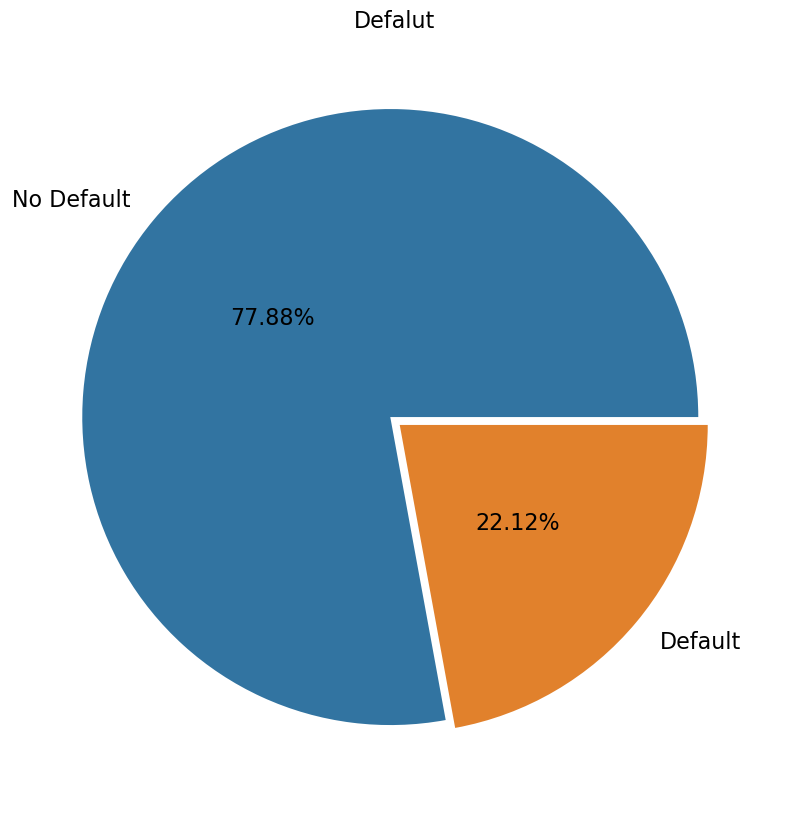



0    23364
1     6636
Name: DEFAULT, dtype: int64


In [12]:
pie, ax = plt.subplots(figsize = [15, 10])
labels  = ['No Default', 'Default']
colors  = ['#3274A1', '#E1812C']
plt.pie(x           = df['DEFAULT'].value_counts(), 
        autopct     ='%.2f%%', 
        explode     = [0.02] * 2, 
        labels      = labels, 
        pctdistance = 0.5, 
        textprops   = {'fontsize': 16}, 
        colors      = colors)

plt.title('Defalut', fontsize = 16)
plt.show()

print("\n")

print(df['DEFAULT'].value_counts())

<hr>

**Remarks**: From the preceding output, we see that around **6636** customers have defaulted
out of **30000** people, which is around **22%**.

#### SEX column

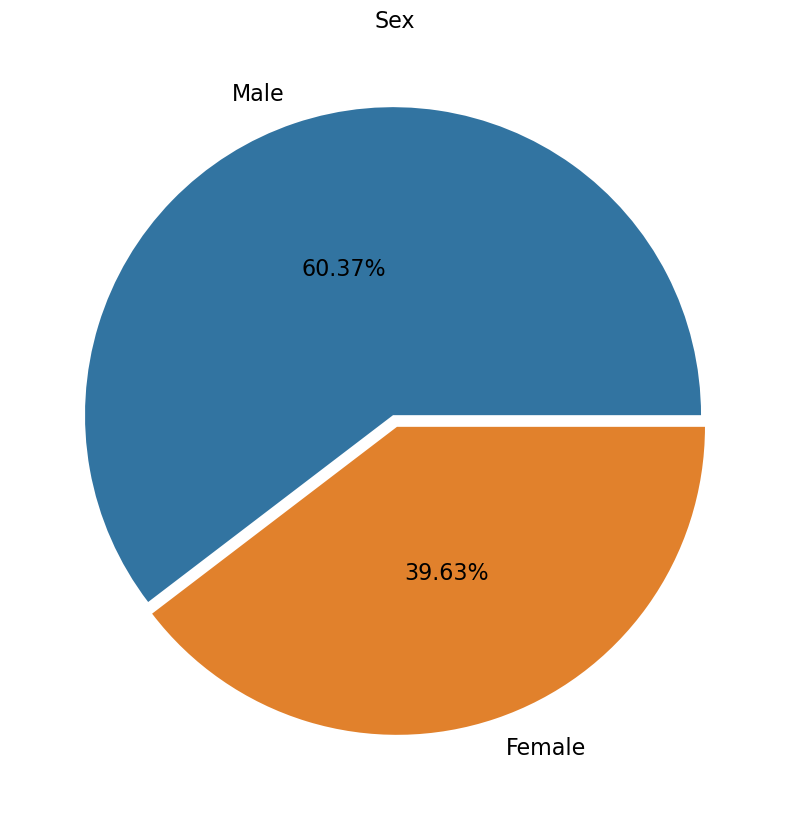



2    18112
1    11888
Name: SEX, dtype: int64


In [13]:
pie, ax = plt.subplots(figsize = [15, 10])
labels  = ['Male', 'Female']
colors  = ['#3274A1', '#E1812C']
plt.pie(x           = df['SEX'].value_counts(), 
        autopct     ='%.2f%%', 
        explode     = [0.02] * 2, 
        labels      = labels, 
        pctdistance = 0.5, 
        textprops   = {'fontsize': 16}, 
        colors      = colors)

plt.title('Sex', fontsize = 16)
plt.show()

print("\n")

print(df['SEX'].value_counts())

<hr>

**Remarks**: As you can see in the preceding output, there are a total of **18112** females and
**11888** males in the given dataset.

#### EDUCATION coulumn

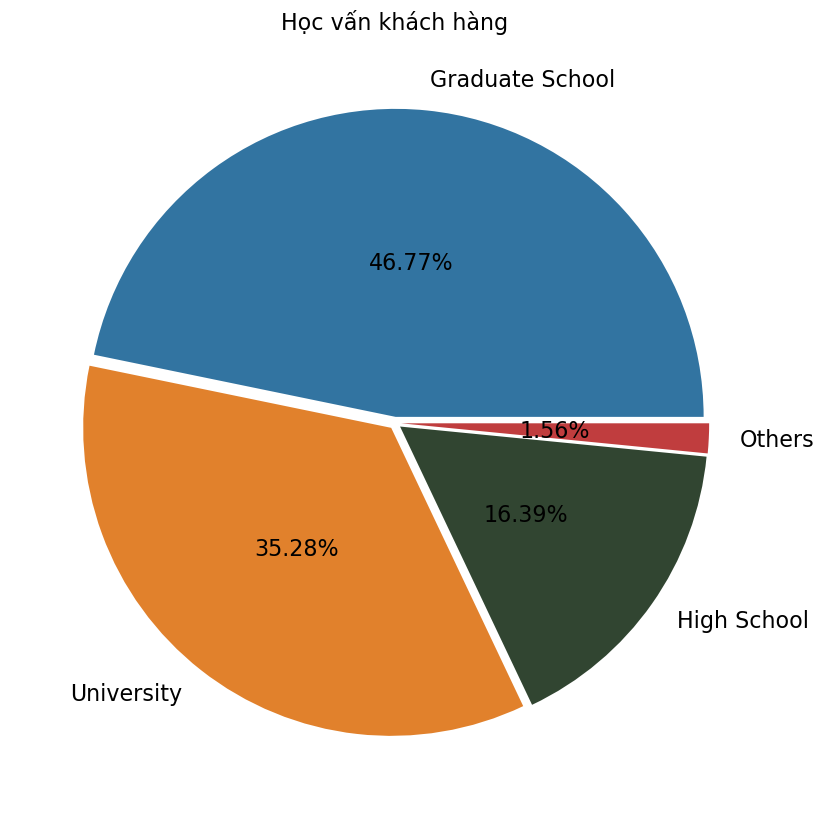



2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


In [14]:
pie, ax = plt.subplots(figsize = [15, 10])
labels  = ['Graduate School', 'University', 'High School', 'Others']
colors  = ['#3274A1', '#E1812C', '#314531', '#C03D3E']
plt.pie(x           = df['EDUCATION'].value_counts(), 
        autopct     = '%.2f%%', 
        explode     = [0.02] * 4, 
        labels      = labels, 
        pctdistance = 0.5, 
        textprops   = {'fontsize': 16}, 
        colors      = colors)

plt.title('Học vấn khách hàng', fontsize = 16)
plt.show()

print("\n")

print(df['EDUCATION'].value_counts())

<hr>

**Remarks**: From the preceding output, we can infer that most of our customers either went
to graduate school or university.

#### MARRIAGE column

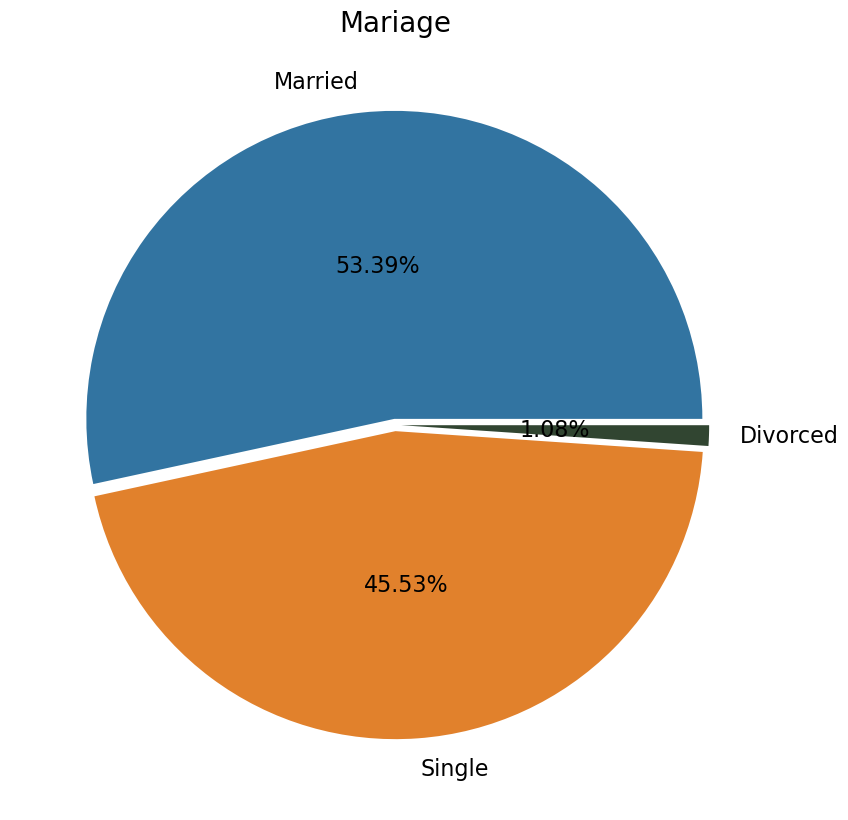



2    16018
1    13659
3      323
Name: MARRIAGE, dtype: int64


In [15]:
pie, ax = plt.subplots(figsize = [15, 10])
labels  = ['Married', 'Single', 'Divorced']
colors  = ['#3274A1', '#E1812C', '#314531']
plt.pie(x           = df['MARRIAGE'].value_counts(), 
        autopct     ='%.2f%%', 
        explode     = [0.02] * 3, 
        labels      = labels, 
        pctdistance = 0.5, 
        textprops   = {'fontsize': 16}, 
        colors      = colors)

plt.title('Mariage', fontsize = 20)
plt.show()

print("\n")

print(df['MARRIAGE'].value_counts())

<hr>

**Remarks**: From the preceding output, we can infer that our dataset has a high number of people who are single (unmarried), closely followed by people who are married.


### Bivariate Analysis
Bivariate analysis is performed between two variables to look at their relationship.

In this section, you will consider the relationship between the **DEFAULT** column and other columns in the DataFrame with the help of the crosstab function and visualization techniques.

#### DEFAULT column & SEX column

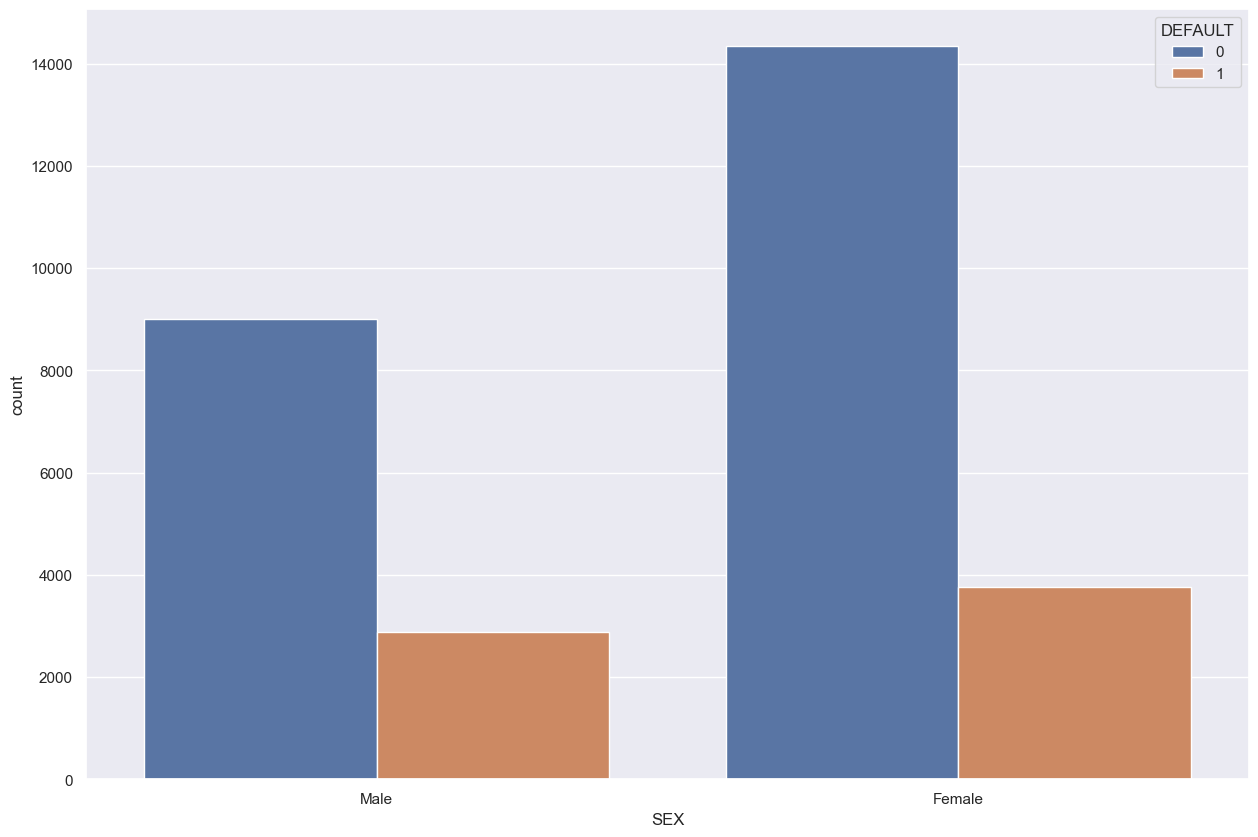

In [16]:
sns.set(rc = {'figure.figsize':(15, 10)})
edu = sns.countplot(x = 'SEX', hue = 'DEFAULT', data = df)
edu.set_xticklabels(['Male', 'Female'])
plt.show()

<hr>

**Remarks**: From the chart above, you can see that more women default than men. But this chart doesn't show us the complete picture.

To determine the percentage of each sex that has defaulted, we will perform cross-tabulation:

In [17]:
pd.crosstab(df.SEX, df.DEFAULT)

DEFAULT,0,1
SEX,,
1,9015,2873
2,14349,3763


<hr>

**Comment**: 
- Male customers: There are **9015** people who **have not yet defaulted** and **2873** people who **have defaulted**.
- Female customers: There are **14349** people who **have not yet defaulted** and **3763** people who **have defaulted**.


We can also find the percentage distribution for each pair by passing in the
**normalize = 'index'** parameter, as follows:

In [18]:
pd.crosstab(df.SEX, df.DEFAULT, normalize = 'index', margins = True)

DEFAULT,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763
All,0.778800,0.221200


<hr>

**Remarks**: As you can see, around **24% of male customers** have defaulted and around **20% of female customers** have defaulted.

#### DEFAULT column & EDUCATION column

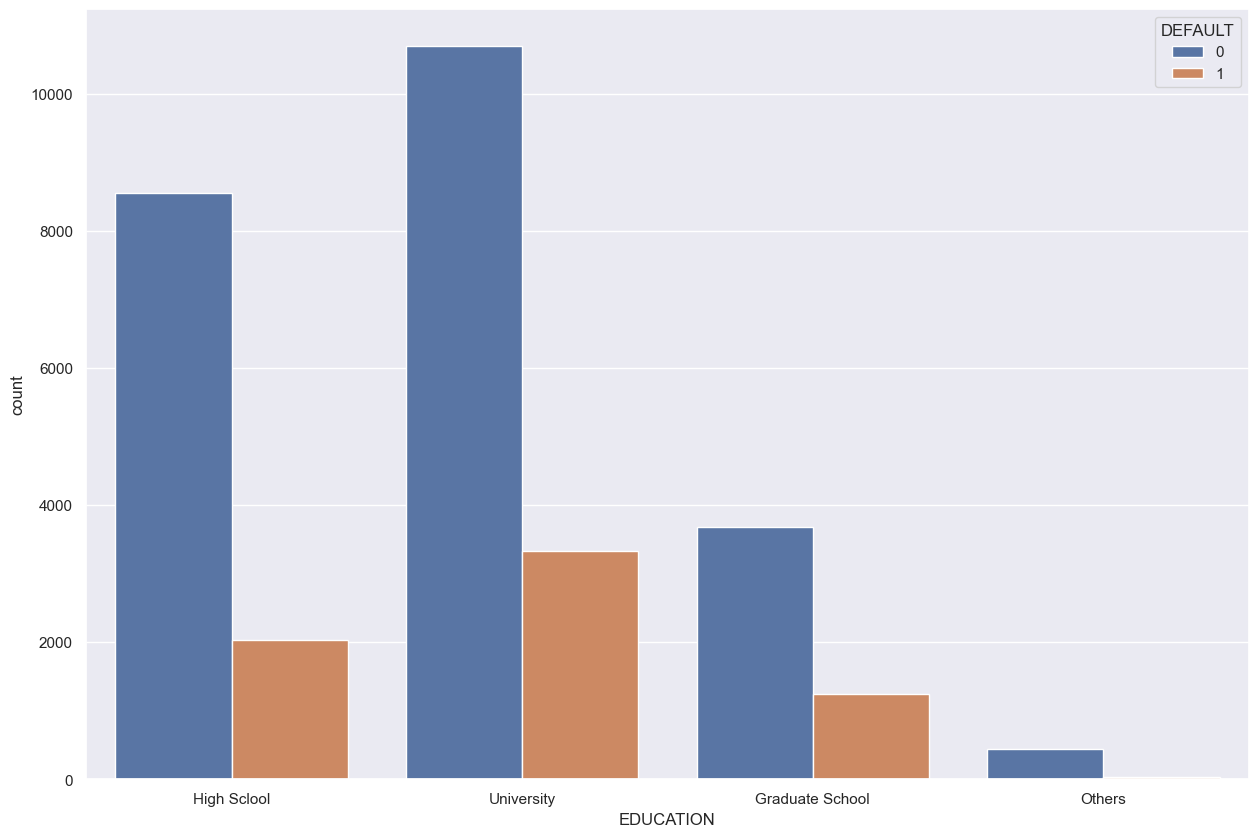

In [19]:
sns.set(rc = {'figure.figsize':(15, 10)})
edu = sns.countplot(x = 'EDUCATION', hue = 'DEFAULT', data = df)
edu.set_xticklabels(['High Sclool', 'University', 'Graduate School', 'Others'])

plt.show()

<hr>

**Remarks**: Looking at the chart above, you can conclude from the graph that a large number of defaults occur for the most highly qualified clients, namely University.

To determine which subcategory has a higher default percentage, perform a crosstab with the following code:

In [20]:
pd.crosstab(df.EDUCATION, df.DEFAULT, normalize = 'index')

DEFAULT,0,1
EDUCATION,,
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.929487,0.070513


<hr>

**Remarks**: As you can see, about **24% of customers with university** degrees defaulted and about **19% of customers with graduate** degrees also defaulted.

#### DEFAULT column & MARRIAGE column

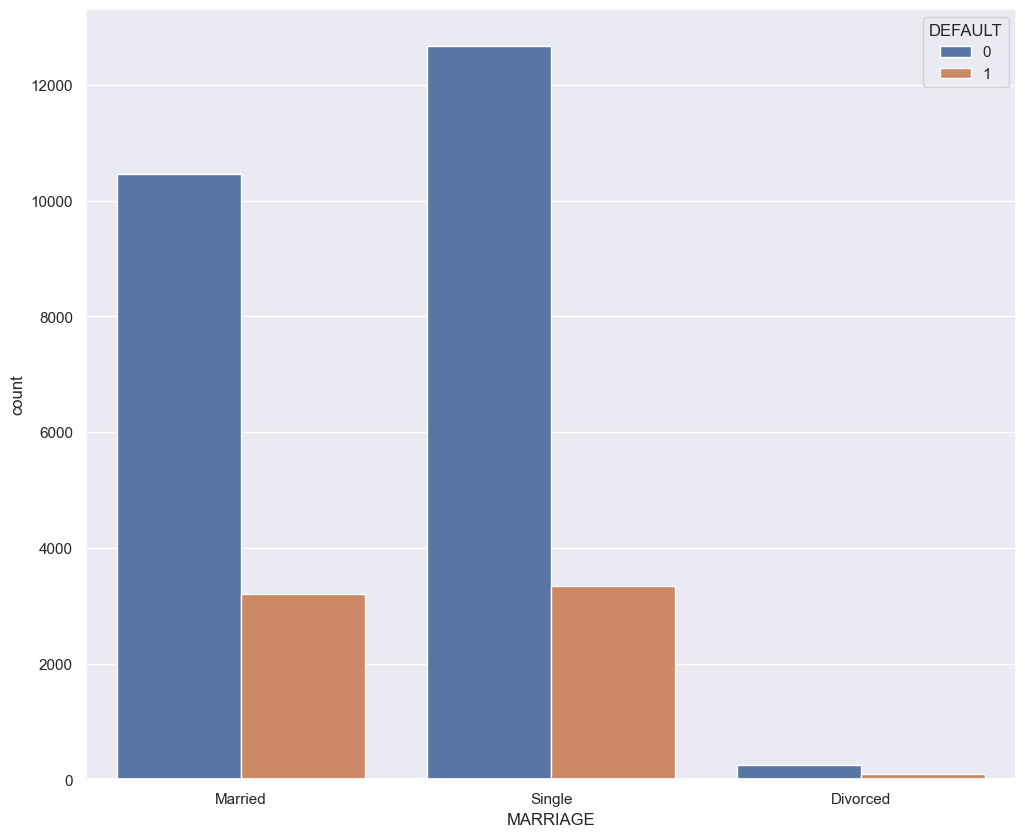

In [21]:
sns.set(rc = {'figure.figsize':(12, 10)})
marriage = sns.countplot(x = "MARRIAGE", hue = 'DEFAULT', data = df)
marriage.set_xticklabels(['Married', 'Single', 'Divorced'])
plt.show()

<hr>

**Remarks**: From the previous chart, we can see that married and single people have almost equal number of defaults.

To determine what percentage of married/single/other people default, cross-tabulate:

In [22]:
pd.crosstab(df.MARRIAGE, df.DEFAULT, normalize = 'index')

DEFAULT,0,1
MARRIAGE,,
1,0.765283,0.234717
2,0.791110,0.208890
3,0.739938,0.260062


<hr>

**Remarks**: The rate of married and single defaulters is almost equal from **20-23%**.

#### DEFAULT & PAY_1 
In this section, we will be looking at the relationship between the **DEFAULT** column and **PAY_1** column (the repayment status in the month of September 2005).

We can use the crosstab function to visualize the relationship between DEFAULT
and PAY_1. This gives the percentage of defaults for each subcategory:

In [23]:
pd.crosstab(df.PAY_1, df.DEFAULT, margins = True)

DEFAULT,0,1,All
PAY_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


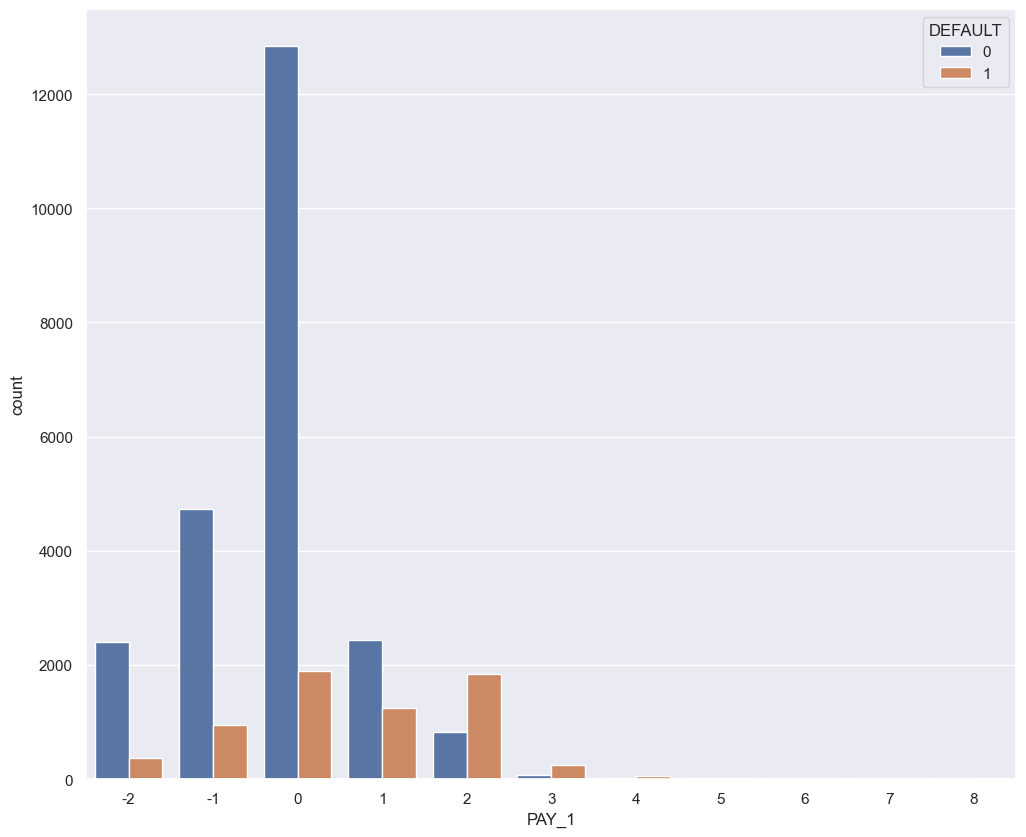

In [24]:
sns.set(rc = {'figure.figsize':(12, 10)})
marriage = sns.countplot(x = "PAY_1", hue = 'DEFAULT', data = df)
plt.show()

<hr>

**Remarks**: 
- From the output of the crosstab function, we can see that the maximum count of defaults falls under subcategory 2—that is, a payment delay for the last 2 months.

- This implies that a customer who has missed payments for 2 continuous months has a high probability of default. 

#### DEFAULT column & Balance column

**The balance** is the amount given as credit. It includes both the individual consumer's credit and their family's (supplementary) credit.


We will be plotting a categorical plot between **DEFAULT** and **LIMIT_BAL**:

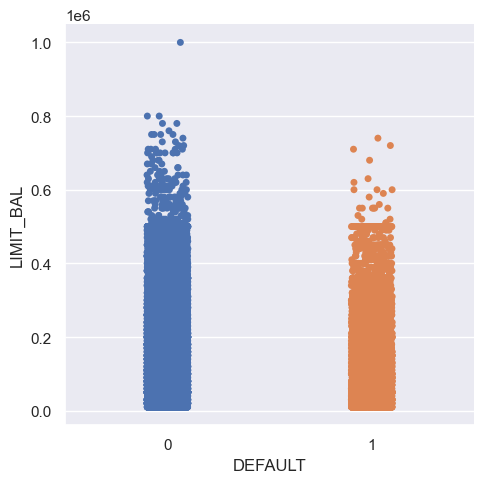

In [25]:
sns.catplot(x = "DEFAULT", y = "LIMIT_BAL", jitter = True, data = df)

<hr>

**Remarks**: We can infer that customers with higher balances have a lower probability of default than customers with lower balances.

#### DEFAULT column & AGE column

In this section, our main goal is to find out which age group has the highest default rate:

Apply the **`crosstab`** function to evaluate the relationship between the **DEFAULT** and **AGE** column:

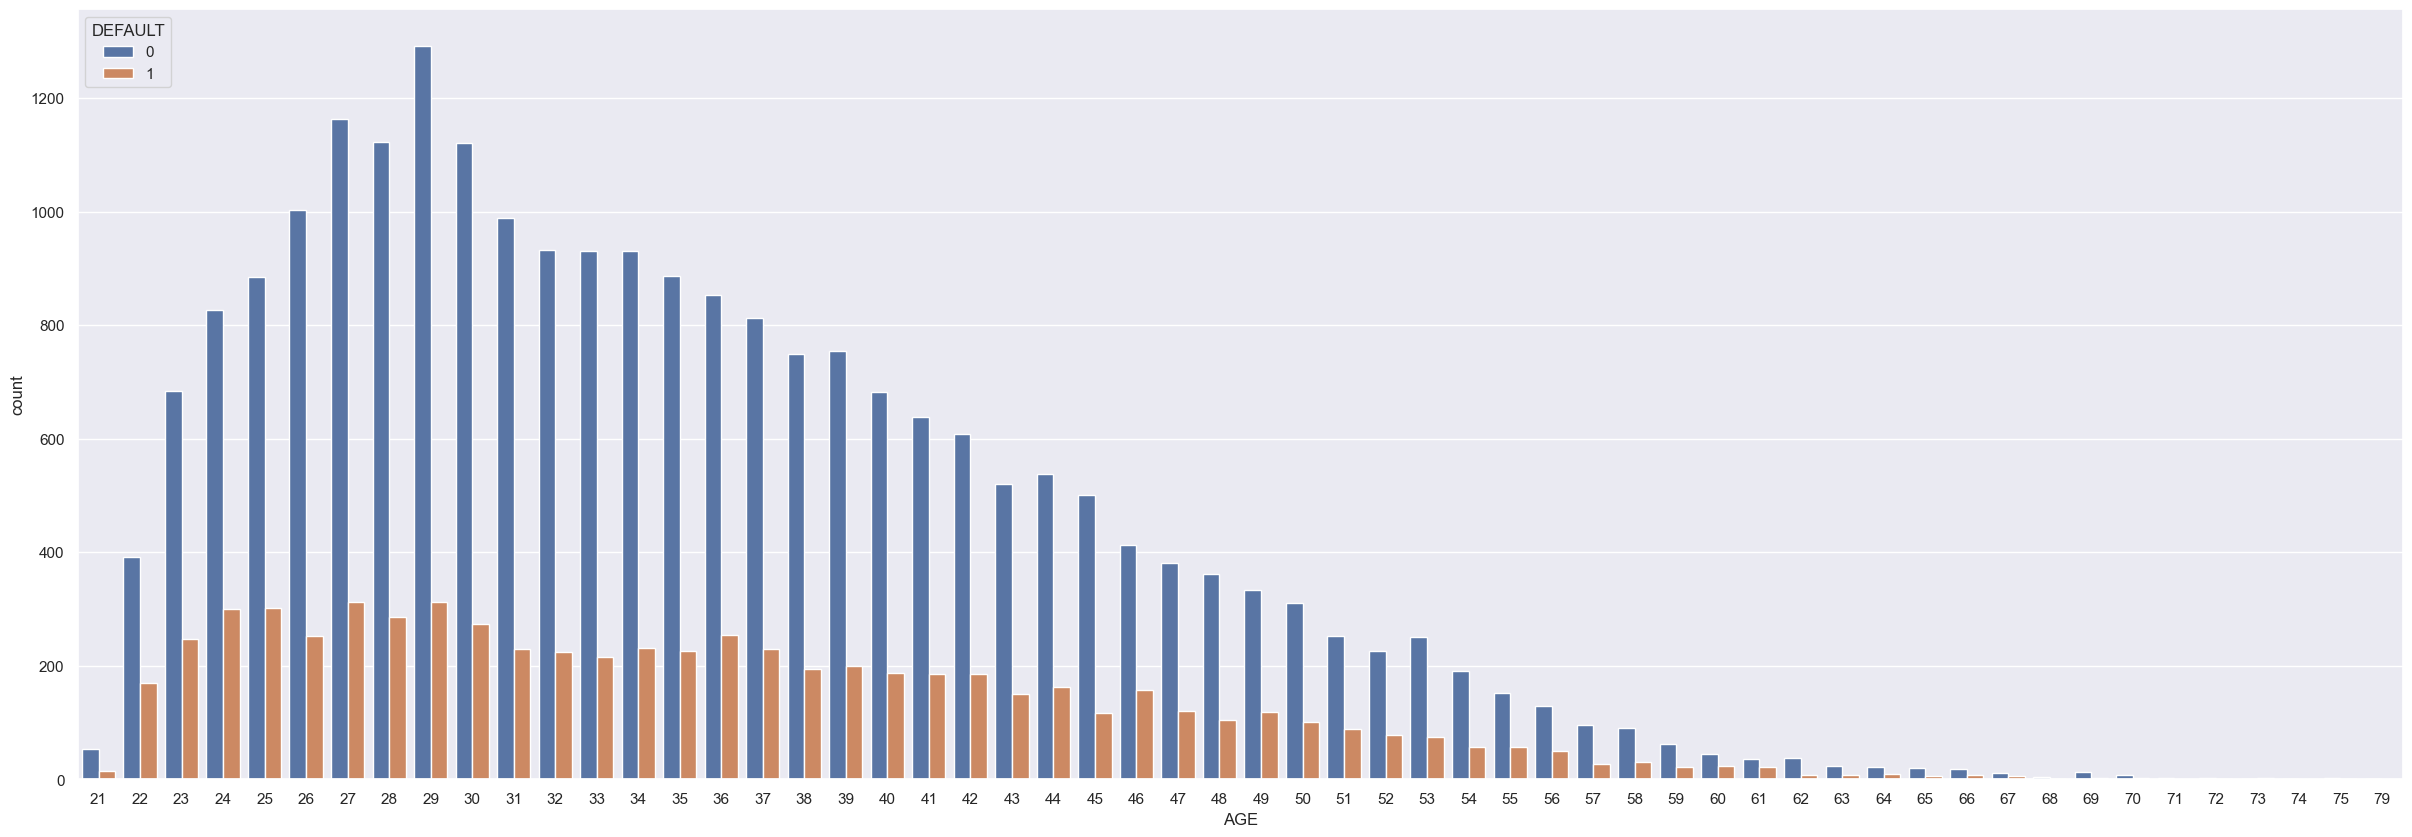

In [26]:
sns.set(rc = {'figure.figsize':(30, 10)})
marriage = sns.countplot(x = "AGE", hue = 'DEFAULT', data = df)
plt.show()

In [27]:
pd.crosstab(df.AGE, df.DEFAULT)

DEFAULT,0,1
AGE,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


To determine which age group has the highest default rate, perform cross-tabulation with **`normalize = 'Index'`**:

In [28]:
pd.crosstab(df.AGE, df.DEFAULT, normalize = 'index', margins = True)

DEFAULT,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


<hr>

**Nhận xét**: As you can see, the age groups with the highest default number of times are **27 and 29**. To find the division based on percentage in each age category, we need to do cross-tabulation, which will be covered. in the next step.

## Tương quan

### Đánh giá mối tương quan giữa các cột bằng bản đồ nhiệt

In this activity, we will analyze the correlation of the <b>DEFAULT</b> column with other columns of the rest of the DataFrame columns and visualize the analysis using a heat map. By finding the correlation between these and the <b>DEFAULT</b> column, we can determine which feature has a higher impact on the <b>DEFAULT</b> column and whether that feature has
impact is positive or negative.

In [29]:
sns.set(rc = {'figure.figsize':(30, 10)})
sns.set_context("talk", font_scale = 0.7)

<AxesSubplot:>

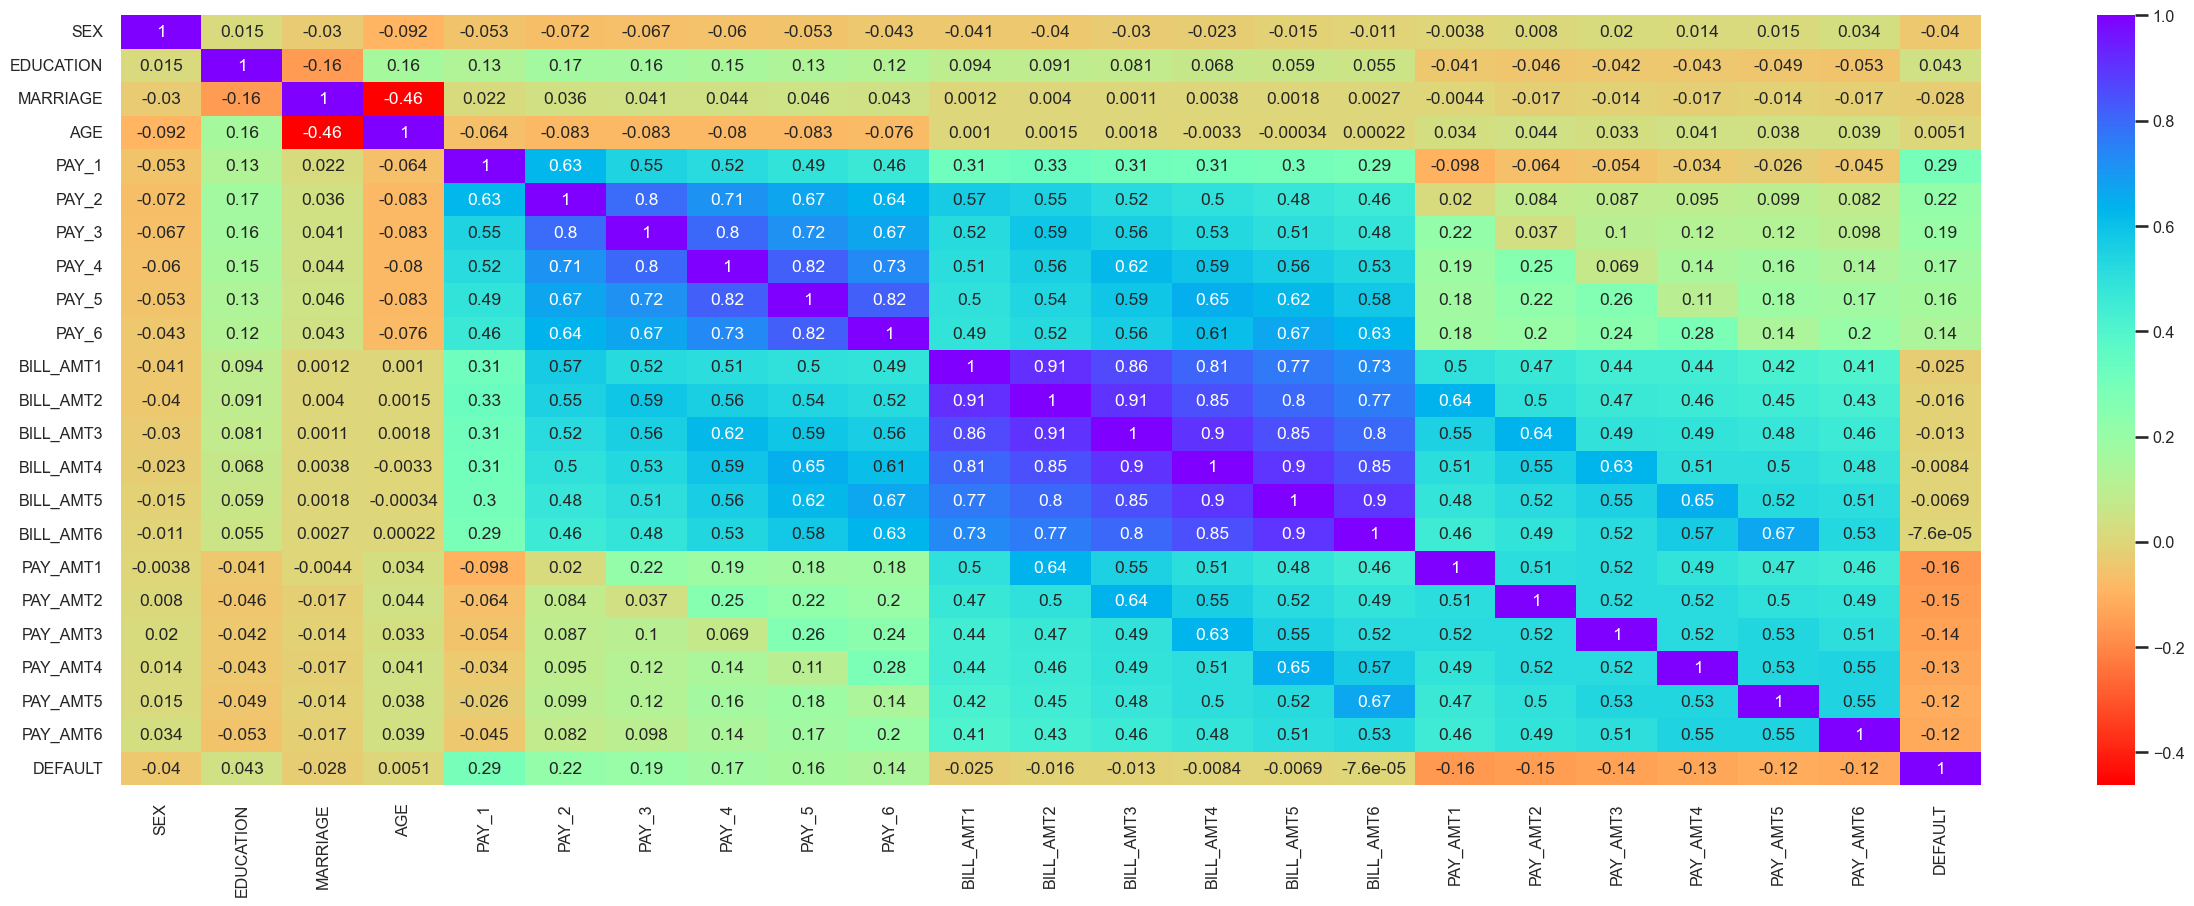

In [30]:
sns.heatmap(df.iloc[:,1:]. \
            corr(method = 'spearman'), 
            cmap = 'rainbow_r', 
            annot = True)

In [31]:
df.drop("DEFAULT", axis = 1).apply(lambda x: x.corr(df.DEFAULT,
                                                    method = 'spearman'))

LIMIT_BAL   -0.169586
SEX         -0.039961
EDUCATION    0.043425
MARRIAGE    -0.028174
AGE          0.005149
PAY_1        0.292213
PAY_2        0.216919
PAY_3        0.194771
PAY_4        0.173690
PAY_5        0.159043
PAY_6        0.142523
BILL_AMT1   -0.025327
BILL_AMT2   -0.015554
BILL_AMT3   -0.012670
BILL_AMT4   -0.008357
BILL_AMT5   -0.006851
BILL_AMT6   -0.000076
PAY_AMT1    -0.160493
PAY_AMT2    -0.150977
PAY_AMT3    -0.139388
PAY_AMT4    -0.127979
PAY_AMT5    -0.116587
PAY_AMT6    -0.121444
dtype: float64

<hr>

**Remarks**: 
- We can easily conclude that column <b>DEFAULT</b> has a high positive correlation with <b>PAY_1</b>, that is, if customer has missed a payment in the first month, they have a higher chance of missing out
payments in consecutive months.

- In addition, column <b>DEFAULT</b> has the highest negative correlation with PAY_AMT1, which means that the higher the payment for September 2005 the lower the probability of default.

## Building a Profile of a High-Risk Customer

Based on the analysis performed in the previous sections, we can now build a profile of the customer who is most likely to default. With this predicted customer profile, credit card companies can take preventive steps (such as reducing creditlimits or increasing the rate of interest) and can demand additional collateral from customers who are deemed to be high risk.

The customer who satisfies the majority of the following conditions can be classified as a high-risk customer. A high-risk customer is one who has a higher probability of default:
+ **A male customer** is **more likely to default** than a **female customer**.
+ People with a relationship status of **other** are more likely to default than married or single people.
+ A customer whose highest educational qualification is a **high-school** diploma is **more likely to default** than a customer who has gone to **graduate school or university**.
+ A customer who has **delayed payment for 2 consecutive months** has a higher probability of default.
+ A customer who is **22 years of age** has a higher probability of defaulting on payments than any other age group. 

## Conclusion

In this article, we applied univariate EDA to a given data set to plot the distribution of individual features and performed a two-variable analysis to understand the relationship between two features. We also used the correlation heatmap to determine the correlation of the DataFrame's features. Drawing conclusions from the results of our analysis, we were able to construct a probabilistic statistical profile of a high-risk customer most likely to default on a loan.